In [1]:
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
path = './data/raw_data_0304_160Mbps_5sec.cap0'
data = np.fromfile(path, dtype='int16')

In [3]:
data

array([   0,    0,  -81, ..., -392, -426, -422], dtype=int16)

In [4]:
data_num = len(data)
t_stemp = np.arange(data_num)/1e7

end_time = 5
fs = data_num/end_time

T = 1/fs



print('number of data :', data_num)
print("time_stemp :", t_stemp)
print("Sampling Frequency :", fs)

data_fft = np.fft.fft(data)
amplitude = abs(data_fft)*(2/len(data_fft))
frequency = np.fft.fftfreq(len(data_fft), T)

number of data : 50103518
time_stemp : [0.0000000e+00 1.0000000e-07 2.0000000e-07 ... 5.0103515e+00 5.0103516e+00
 5.0103517e+00]
Sampling Frequency : 10020703.6


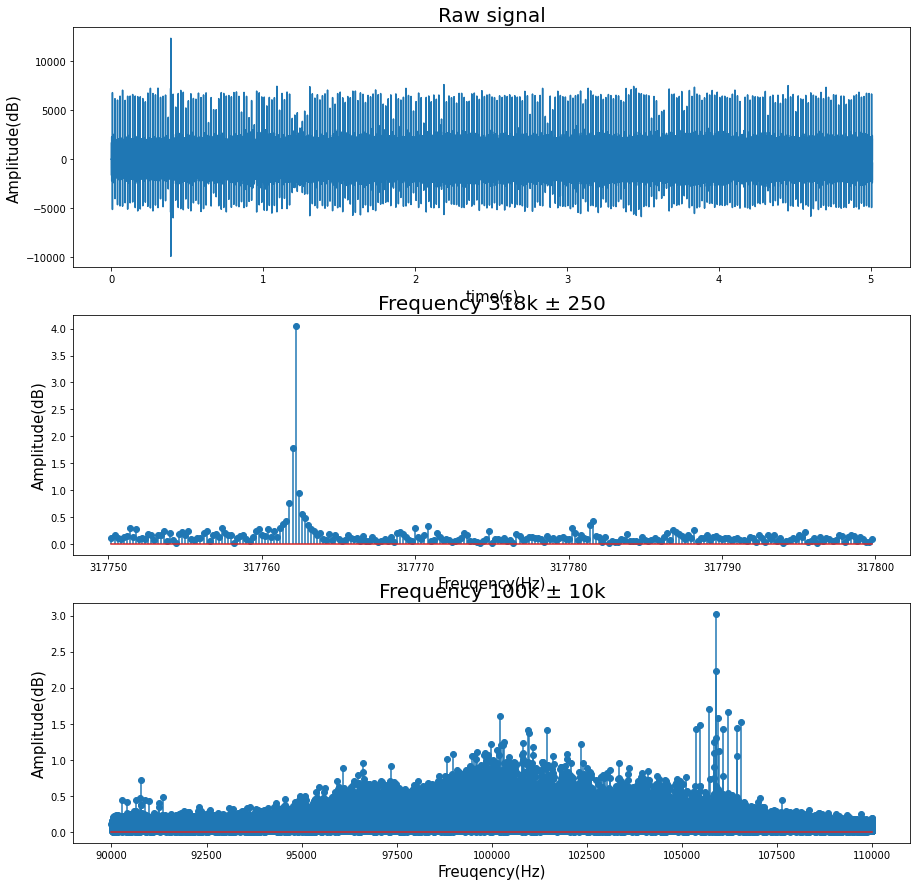

In [20]:
f_318k = frequency[(frequency>318e3-250) & (frequency<318*1e3 - 200)]
a_318k = amplitude[(frequency>318e3-250) & (frequency<318*1e3 - 200)]

f_100k = frequency[(frequency>100e3-10e3) & (frequency<100e3+10e3)]
a_100k = amplitude[(frequency>100e3-10e3) & (frequency<100e3+10e3)]

fig, axes = plt.subplots(3, 1, figsize=(15, 15))
axes[0].plot(t_stemp, data)
axes[0].set_title("Raw signal", fontsize=20)
axes[0].set_xlabel("time(s)", fontsize=15)
axes[0].set_ylabel("Amplitude(dB)", fontsize=15)

axes[1].stem(f_318k, a_318k)
axes[1].set_title("Frequency 318k ± 250", fontsize=20)
axes[1].set_xlabel("Freuqency(Hz)", fontsize=15)
axes[1].set_ylabel("Amplitude(dB)", fontsize=15)


axes[2].stem(f_100k, a_100k)
axes[2].set_title("Frequency 100k ± 10k", fontsize=20)
axes[2].set_xlabel("Freuqency(Hz)", fontsize=15)
axes[2].set_ylabel("Amplitude(dB)", fontsize=15)

plt.show()

In [ ]:
# Pass filter
from scipy.signal import butter, lfilter    

<function matplotlib.pyplot.show(close=None, block=None)>

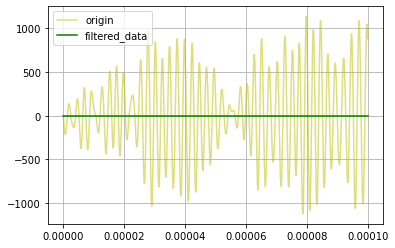

In [30]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

lowcut = 318e3-250
highcut = 318e3+250

# BPF
filtered = butter_bandpass_filter(data, lowcut, highcut, fs, order=5)

plt.plot(t_stemp[:1000], data[:1000], 'y', label='origin', alpha=0.5)
plt.plot(t_stemp[:1000], filtered[:1000], 'g', label='filtered_data')
plt.legend()
plt.grid(True)
plt.show